In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
df = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

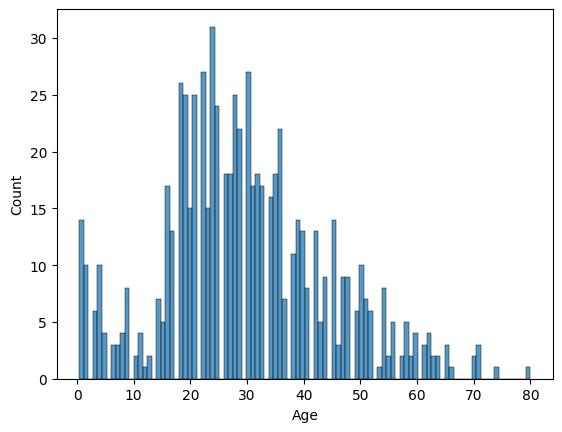

In [ ]:

sns.histplot(data=df, x='Age', bins=100)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

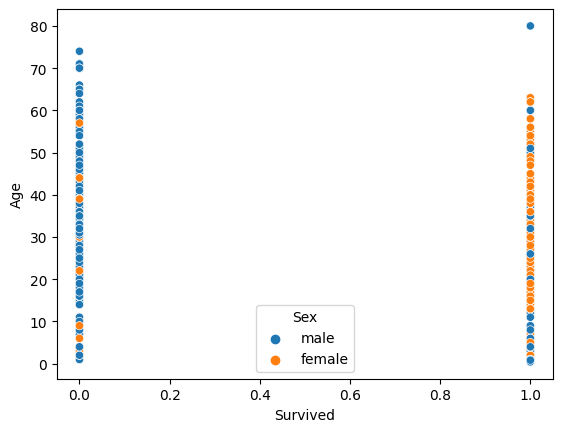

In [ ]:
sns.scatterplot(data=df, x='Survived', y='Age', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

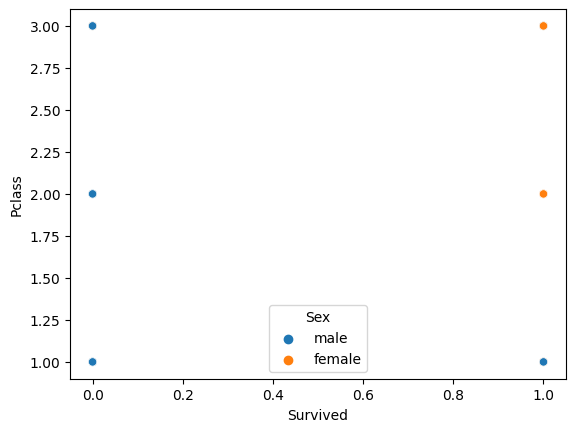

In [ ]:
sns.scatterplot(data=df, x='Survived', y='Pclass', hue='Sex')

In [ ]:
df[df['Pclass'] == 1]['Sex'].value_counts()

male      122
female     94
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Parch'>

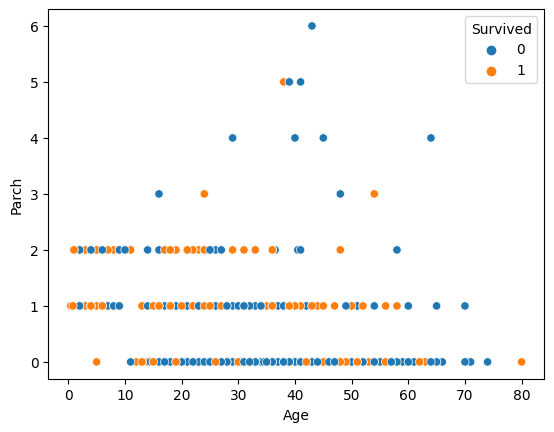

In [ ]:
sns.scatterplot(data=df, x='Age', y='Parch', hue='Survived')

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

<AxesSubplot:xlabel='Age', ylabel='Count'>

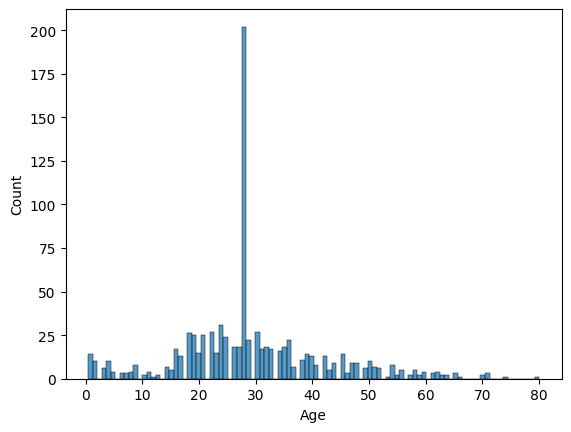

In [ ]:
sns.histplot(data=df, x='Age', bins=100)

In [7]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [9]:
df['Sex'] = df['Sex'].apply(lambda x : 1 if x =='male' else 0)

In [ ]:
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:

X = df.drop('Survived', axis=1)

y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

model = RandomForestClassifier(n_jobs=-1)


param_grid = {
    'n_estimators' : [100, 150, 200, 250, 400],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 3, 4]
}

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_model.fit(X_train, y_train)

cv = KFold(n_splits=3, random_state=42, shuffle=True)

cross_val_score(grid_model.best_estimator_, X, y, cv=cv).mean()




/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.7865416208677565

In [34]:

df_with_pred_nan = pd.read_csv('train.csv')

df_with_pred_nan = df_with_pred_nan.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)

df_with_pred_nan = df_with_pred_nan[df_with_pred_nan['Embarked'].notna()]

df_with_pred_nan['Sex'] = df_with_pred_nan['Sex'].apply(lambda x : 1 if x =='male' else 0)

df_with_pred_nan = pd.get_dummies(df_with_pred_nan, columns=['Embarked'], drop_first=True)



df_with_pred_nan_train = df_with_pred_nan[df_with_pred_nan['Age'].isnull() == False]

df_with_pred_nan_test = df_with_pred_nan[df_with_pred_nan['Age'].isnull() == True]

y = df_with_pred_nan_train['Age']

df_with_pred_nan_train = df_with_pred_nan_train.drop(['Survived', 'Age'], axis=1)

df_with_pred_nan_test = df_with_pred_nan_test.drop(['Survived', 'Age'], axis=1)







In [36]:
model_l = LinearRegression()

model_l.fit(df_with_pred_nan_train, y)

predict = model_l.predict(df_with_pred_nan_test)

data = df_with_pred_nan

index = df_with_pred_nan_test.index.to_numpy()

data.loc[index, 'Age'] = predict #прирост на пару сотых на том же лесе на cross val score

In [ ]:
model = SVR()

model.fit(df_with_pred_nan_train, y)

predict = model.predict(df_with_pred_nan_test)

data = df_with_pred_nan

index = df_with_pred_nan_test.index.to_numpy()

data.loc[index, 'Age'] = predict

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [14]:
X = data.drop('Survived', axis=1)

y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_jobs=-1)


param_grid = {
    'n_estimators' : [100, 150, 200, 250, 400],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 3, 4]
}

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

grid_model.fit(X_train, y_train)

cv = KFold(n_splits=3, random_state=42, shuffle=True)

cross_val_score(grid_model.best_estimator_, X, y, cv=cv).mean()

0.8155503988837323

In [15]:
lgbm = LGBMClassifier()

X = data.drop('Survived', axis=1)

y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 10, 20],
    'bagging_freq': [0, 1],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
}

grid_model_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3)

grid_model_lgbm.fit(X_train, y_train)

predict = grid_model_lgbm.predict(X_test)

accuracy_score(y_test, predict)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0.7808988764044944

In [21]:
pipe_rf = Pipeline([
    ('model', RandomForestClassifier(**grid_model.best_params_)),
])
pipe_lgbm = Pipeline([
    ('model', LGBMClassifier(**grid_model_lgbm.best_params_))
])

estimators = [
    ('rf', pipe_rf),
    ('lgbm', pipe_lgbm)
]

stack = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(**grid_model_lgbm.best_params_))

stack.fit(X_train, y_train)

predict = stack.predict(X_test)

accuracy_score(y_test, predict)

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 71

0.797752808988764

In [43]:
test = pd.read_csv('test.csv')

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.isnull().sum()


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [44]:
idd = test['PassengerId']

In [45]:

test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# test['Age'] = test['Age'].fillna(test['Age'].median())

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

test['Sex'] = test['Sex'].apply(lambda x : 1 if x =='male' else 0)

test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

test_nan = test[test['Age'].isnull() == True]

test_nan = test_nan.drop('Age', axis=1)

index = test_nan.index.to_numpy()

predict = model_l.predict(test_nan)

test.loc[index, 'Age'] = predict

# data = df_with_pred_nan

# index = df_with_pred_nan_test.index.to_numpy()

# data.loc[index, 'Age'] = predict



In [46]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


<AxesSubplot:xlabel='Age', ylabel='Survived'>

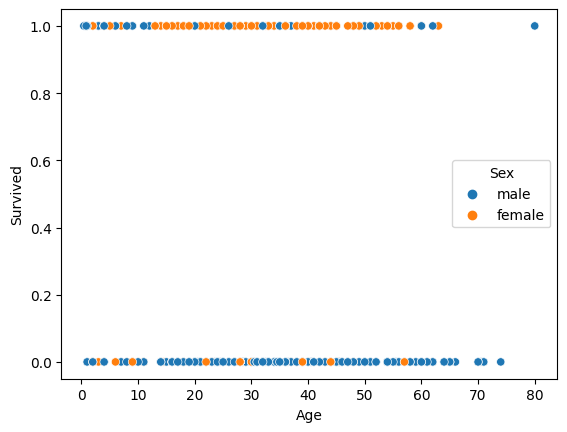

In [ ]:
sns.scatterplot(data=df, x='Age', y='Survived', hue='Sex')

In [48]:
p = stack.predict(test)



[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


In [49]:
res = pd.DataFrame({'PassengerId' : idd, 'Survived' : p})

In [50]:
res.to_csv('res.csv', index=False)

In [29]:
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
